# Neural Network with TensorFlow - regression problem (extended)


## The Step 2-4 to design the model compile it and execute is the same as in the 

  * create an architecture of a sequential `model`
  * `model`.compile
  * `model`.fit
  * `model`.evaluate
  * `model`.predict

What are the main differences between implementing the Neural Network for a classification problem and regression problem in the model parameters:

* activation functions 
  * in classification problem usually there is a multiple output with the probabitlity activation function for the last layer: activation='softmax')
  * in regression problem usually there is a single output with the linear activation function in the last layer: activation='linear')
  
* loss functions
   * in classification the loss function is usually: loss='binary_crossentropy',loss='sparse_categorical_crossentropy', loss='categorical_crossentropy',
   * in regression the loss is usually: loss='mse', loss='mae', loss='mape'
  

# Lets perform the Prediction on the diabetes progression from 10 features 

* (the same problem could be a classification problem if the diabetes values were descrete)

https://medium.com/analytics-vidhya/introduction-to-linear-regression-sklearn-diabetes-dataset-f63378b0a1ee

#### Load the data

In [1]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [2]:
# Save the input and target variables
print(data['DESCR'])
X_data=data['data']
y_data=data['target']
print(dir(data))

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [3]:
y_data[0:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [4]:
X_data[0:5,0:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485]])

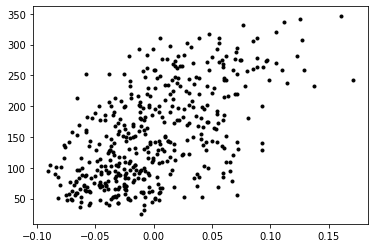

In [5]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.plot(X_data[:,2],y_data[:],'.k')

In [6]:
# Normalise the target data (this will make clearer training curves)
#X_data=(X_data-X_data.mean())/(X_data.std())
y_data=(y_data-y_data.mean())/(y_data.std())

In [7]:
X_data[0:5,0:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485]])

In [8]:
y_data[0:10]

array([-0.01471948, -1.00165882, -0.14457991,  0.69951294, -0.22249618,
       -0.71596585, -0.18353805, -1.15749134, -0.54714728,  2.05006151])

In [9]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test)=train_test_split(X_data,y_data,test_size=0.1,random_state=1234)
print(X_train.shape)
print(X_test.shape)

(397, 10)
(45, 10)


In [10]:
print(X_train[0].shape)
print(X_test.shape)

(10,)
(45, 10)


#### Train a feedforward neural network model

In [11]:
import tensorflow as tf
print(tf.__version__)
tf.random.set_seed(1234)

2.5.0


In [12]:
# Build the model
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense,

def get_model(input_shape):
    model=Sequential([InputLayer(input_shape=input_shape),
                Dense(units=128,activation='relu'),
                Dense(units=128,activation='relu'),
                Dense(units=128,activation='relu'),
                Dense(units=128,activation='relu'),
                Dense(units=128,activation='relu'),
                Dense(units=128,activation='relu'),
                Dense(units=1,activation='linear') # by default
    ])
    return model


In [13]:
# Print the model summary
model=get_model(X_train[0].shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

## Losses
https://keras.io/api/losses/regression_losses/

In [14]:
#"mean_absolute_percentage_error"
#"mean_absolute_error"
#"mean_squared_error"

In [15]:
# Compile the model

def compile_model(model):
        model.compile(optimizer='adam',loss='mae',metrics=['mae'])
#model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
#    loss='mean_absolute_error',metrics=['mape'])

In [16]:
compile_model(model)

In [17]:
# Train the model, with some of the data reserved for validation
history=model.fit(X_train,y_train,batch_size=64, epochs=100, validation_split=0.15, verbose=0)

In [18]:
# Evaluate the model on the test set
loss,accuracy=model.evaluate(X_test,y_test)
print(accuracy)

2/2 [==============================] - 0s 4ms/step - loss: 0.6376 - mae: 0.6376
0.6376141309738159


#### Plot the learning curves

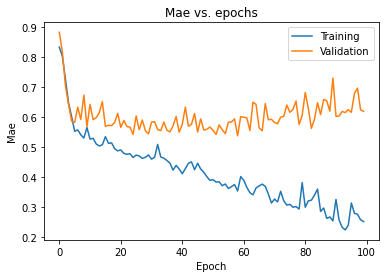

In [19]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mae vs. epochs')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [20]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

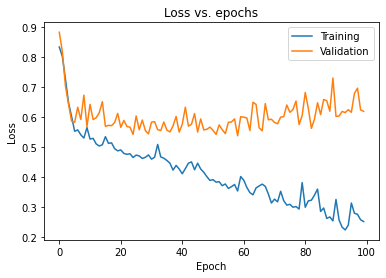

In [21]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [22]:
pred = model.predict(X_test[0:1])
print(pred)
print(y_test[0:1])

[[0.28559548]]
[-0.56013332]


# Regularizers

Regularization is used in Deep Learning in order to tune the weights, biases and output of hidden layer just to prevent the model to be overfitted. Now it is always debatable whether weights to be regularized first and then activated or the activation output to be regularized. This study is being done to understand the same using respective functionalities available in Keras.

We have the regression equation $y=Wx+b$, where $x$ is the input, $W$ the weights matrix and $b$ being the biases. We have also seen something similar in the form of $h_{\theta} = \theta_0 + \theta_1 x$

There are three types of regularizers in TensorFlow ($y=Wx+b$)

* Kernel Regularizer: Tries to reduce the weights $W$ (excluding bias).
* Bias Regularizer: Tries to reduce the bias $b$
* Activity Regularizer: Tries to reduce the layer's output $y$ thus will reduce the weights and adjust bias so $Wx+b$ is smallest.

First we have to import the regularizers:

In [23]:
from tensorflow.keras import regularizers

Regularizers are declared in the dense layers of Neural Networks. In Tensorflow its very simple:

* Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu")

* kernel regulizer tries to reduce the weighs (coefficients)
  * keras.regularizers.l1(0.0001)
  * keras.regularizers.l2(0.01)
  * keras.regularizers.l1_l2(l1=0.01, l2=0.01)
  * kernel_regularizer = regularizers.l2(wd) # default is 0.01
  * wd=weight_decay (penalty)
  * default is 0.01


* bias regularizer tries to reduce bias ($\theta_0$)
  * kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)

In [46]:
def get_regularized_model(input_shape,wd):
    model=Sequential([InputLayer(input_shape=input_shape),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dense(units=1,activation='linear') # by default
    ])
    return model

In [47]:
model = get_regularized_model(X_train[0].shape,0.0005)

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_30 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_31 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                

In [49]:
compile_model(model)

In [50]:
history=model.fit(X_train,y_train,batch_size=64, epochs=100, validation_split=0.15,verbose=0)

In [51]:
loss,accuracy=model.evaluate(X_test,y_test)
print(accuracy)

2/2 [==============================] - 0s 3ms/step - loss: 0.7109 - mae: 0.6149
0.6149387955665588


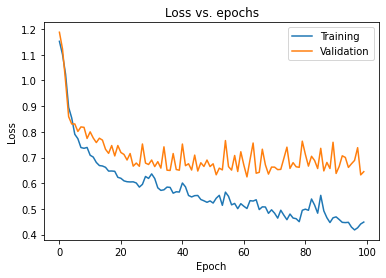

In [52]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## Dropout(rate)
Another way to prevent overfitting is to randomly switch on and of some neurons with a given rate.
This is called ***dropout***

Problem:

When a fully-connected layer has a large number of neurons, co-adaption is more likely to happen. Co-adaptation refers to when multiple neurons in a layer extract the same, or very similar, hidden features from the input data. This can happen when the connection weights for two different neurons are nearly identical.

* The word ‘dropout’ refers to the discharge of units in a neural network (both secret and visible).

* In simple terms, a dropout means that those neurons, which are selected at random, are ignored by the units (i.e. neurons). By ‘not knowing’ this means that during a certain forward or backward pass these units are not considered.

* In other words: Drop-out is a regularisation technique in neural networks that reduces interdependent neuronal learning.
 

* Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.

* The default interpretation of the dropout hyperparameter is the probability of training a given node in a layer, where 1.0 means no dropout, and 0.0 means no outputs from the layer.

* A good value for dropout in a hidden layer is between 0.5 and 0.8. Input layers use a larger dropout rate, such as of 0.8.

* Practically speaking Dropout rate of 0.5 seems most effective 
  0.5 means that each hidden unit (neuron) is switched of with probability 0.5
  
* The dropout rate is set to 20% (0.2), meaning one in 5 inputs will be randomly excluded from each update cycle. 

<table><tr>
<td> <img src="imgs/dropout.png" width="600" /> </td>
</tr></table>

In Keras, the dropout rate argument is (1-p). For intermediate layers, choosing (1-p) = 0.5 for large networks is ideal.

(https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

In [53]:
from tensorflow.keras.layers import Dropout

In [55]:
def get_regularized_model(input_shape,wd,drate):
    model=Sequential([InputLayer(input_shape=input_shape),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dropout(drate),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dropout(drate),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dropout(drate),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dropout(drate),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dropout(drate),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dense(units=1,activation='linear') # by default
    ])
    return model

In [56]:
model = get_regularized_model(X_train[0].shape,1e-3,0.5)

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)              

In [59]:
compile_model(model)

In [60]:
history=model.fit(X_train,y_train,batch_size=64, epochs=100, validation_split=0.15,verbose=0)

In [61]:
loss,accuracy=model.evaluate(X_test,y_test)
print(accuracy)

2/2 [==============================] - 0s 10ms/step - loss: 0.6661 - mae: 0.5867
0.5866701006889343


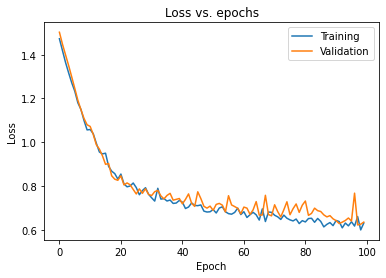

In [62]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()